In [75]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import documents as docs
import textcomparisons as tc
import random
import time

start = time.time()

data_folder = "data"
# article_files = ["articles2019-06-01_" + str(i) + "-" + str(i + 5000) + ".csv" for i in range(0, 100000, 5000)]
# article_files = article_files + ["articles2019-06-01_100000-100755.csv"]

def readArticles(path):
    """ Reads df of articles from the given path, and adds a column
    to store the Document-processed article """
    article_df = pd.read_csv(path)
    article_df["doc"] = None
    return article_df

def dict_by_ids(df, ids):
    """ Given a dataframe of articles and a list of article ids, 
    returns a dictionary with ids as keys and Documents as items, 
    computing and storing the Documents back in the df as needed
    """
    doc_dict = {}
    for doc_id in ids:
        row = df["id"] == doc_id
        doc = df.loc[row, "doc"].iloc[0]
        if doc is None:
            doc = docs.Document(df.loc[row, "text"].iloc[0], clean = False)
            df.loc[row, "doc"] = doc
        doc_dict[doc_id] = doc
    return doc_dict

def subsetmat(mat, inds):
    ''' Returns subset matrix of symmetric matrix mat, using inds
    '''
    subset = np.zeros((len(inds), len(inds)))
    for i in range(len(inds)):
        for j in range(len(inds)):
            subset[i, j] = mat[inds[i], inds[j]]
    return subset

article_df = pd.read_pickle(os.path.join(data_folder, "article_df_20190601"))

events = [event for event in np.unique(article_df["event"]) if not np.isnan(event)]
n = [len(article_df.loc[article_df["event"] == event]) for event in events]
print("Event sizes: ", n)

try:
    results_df = pd.read_csv("results_20190601_clusters_temp.csv")
except: 
    results_df = pd.DataFrame(list(zip(events, n)), columns = ["event", "n"])
    results_df["unique25"] = np.nan
    results_df["unique75"] = np.nan
    results_df["n_good"] = np.nan
    results_df["unique25_good"] = np.nan
    results_df["unique75_good"] = np.nan

ac = tc.ArticleComparisons(thresh_jaccard = .5, thresh_same_sent = .9, thresh_same_doc = .25)
print("Setup time: %d seconds" % np.round(time.time() - start))
article_df.head(3)

Event sizes:  [3175, 7333, 3280, 790, 750, 479, 1267, 2399, 269, 464, 187, 543, 580, 272, 1027, 377, 286, 391, 997, 269, 907, 272, 287, 351, 131, 333, 275, 503, 1067, 135, 691, 225, 123, 241, 263, 108, 140, 70, 239, 365, 172, 79, 244, 68, 68, 54, 69, 172, 172, 165]
Setup time: 2 seconds


,id,publisher,scrape_time,on_homepage,url,title,text,fingerprint,event,doc,paywall
0,0,beforeitsnews.com,2019-06-01T04:51:24-04:00,True,https://beforeitsnews.com/v3/christian-news/20...,"47:2-3, 8-",First Option - Responsorial Psalm: Psalms 47:2...,"{'wordCounts': {'2': 1, '713350': 1, '14736': ...",NaN,None,0.0
1,1,thehindu.com,2019-06-01T08:44:25-04:00,True,https://www.thehindu.com/news/cities/Coimbator...,"In Gudalur, meat will come packed in Koova lea...","ePaper \n Just In \n In Gudalur, meat will com...","{'wordCounts': {'80836': 1, '3': 314, '11': 15...",NaN,None,0.0
2,2,cincinnati.com,2019-06-01T15:30:59-04:00,False,https://www.cincinnati.com/story/money/cars/20...,Trump's Mexico tariffs would hurt GM the most ...,FacebookEmail Twitter Google+ LinkedIn Pintere...,"{'wordCounts': {'17655': 1, '1999': 1, '3693':...",1.0,None,0.0


In [76]:
i = 49
sample = np.array(article_df.loc[article_df["event"] == events[i], "id"])
article_dict = dict_by_ids(article_df, sample)
good_inds = [i for i in range(len(sample)) if article_df.loc[sample[i], "paywall"] == 0]
results_df.loc[i, "n_good"] = len(good_inds)
print(len(good_inds), len(sample))

158 165


In [36]:
clustering = ac.cluster_articles(article_dict, plot = False)
results_df.loc[i, "unique25"] = ac.prop_unique_clusters(thresh_same_doc = 0.25)
results_df.loc[i, "unique25_good"] = ac.prop_unique_clusters(thresh_same_doc = 0.25, inds = good_inds)
results_df.loc[i, "unique75"] = ac.prop_unique_clusters(thresh_same_doc = 0.75)
results_df.loc[i, "unique75_good"] = ac.prop_unique_clusters(thresh_same_doc = 0.75, inds = good_inds)
results_df.iloc[i, :]

0 / 165 done, 0.0 seconds elapsed
17 / 165 done, 72.52 seconds elapsed
33 / 165 done, 113.13 seconds elapsed
50 / 165 done, 164.74 seconds elapsed
66 / 165 done, 199.27 seconds elapsed
83 / 165 done, 236.35 seconds elapsed
99 / 165 done, 259.05 seconds elapsed
116 / 165 done, 279.69 seconds elapsed
132 / 165 done, 307.6 seconds elapsed
149 / 165 done, 323.88 seconds elapsed


event             70.000000
n                165.000000
unique25           0.436364
unique75           0.521212
n_good           158.000000
unique25_good      0.430380
unique75_good      0.506329
Name: 49, dtype: float64

In [37]:
bad_ids = [i for i in sample if isPaywall(i)]
good_ids = [i for i in sample if i not in bad_ids]
for i in bad_ids:
    print(i, "\n", article_dict[i], "\n")
bad_inds = [i for i in range(len(sample)) if i not in good_inds]
# ac.prop_unique_clusters(inds = bad_inds)
# ac.display_mat(jsm_b, xlabs = bad_inds)

14105 
 • 
 May 31, 2019 
 China is reportedly planning to draft a list of companies they call unreliable that they say might harm Chinese business. CNBC's Eunice Yoon reports. 
 What to Read Next 

33684 
 The US war on Huawei not only reeks of double standards but is also killing the free market 
 Sign in/up 
 Opinion 
 Andreea Brînză 
 The US war on Huawei not only reeks of double standards but is also killing the free market 
 By using private companies to further the US’ geopolitical aims, the Trump administration is doing what it fears China will use Huawei to do 
 Moreover, forcing US tech firms to act against their commercial interests violates free market principles 

41676 
 Hi Guest 
 Trump Urges UK To Be "Very Careful" In Involving Huawei In Its 5G Network 
 US President Donald Trump urged Britain to be "very careful" about involving Chinese tech giant Huawei in its new 5G network, in an interview published Saturday ahead of his state visit to London. Asked about reports th

0 / 158 done, 0.0 seconds elapsed
16 / 158 done, 62.24 seconds elapsed
32 / 158 done, 105.07 seconds elapsed
95 / 158 done, 256.11 seconds elapsed
111 / 158 done, 278.14 seconds elapsed
0.5063291139240507


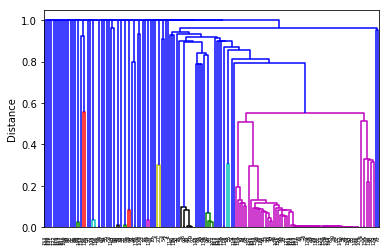

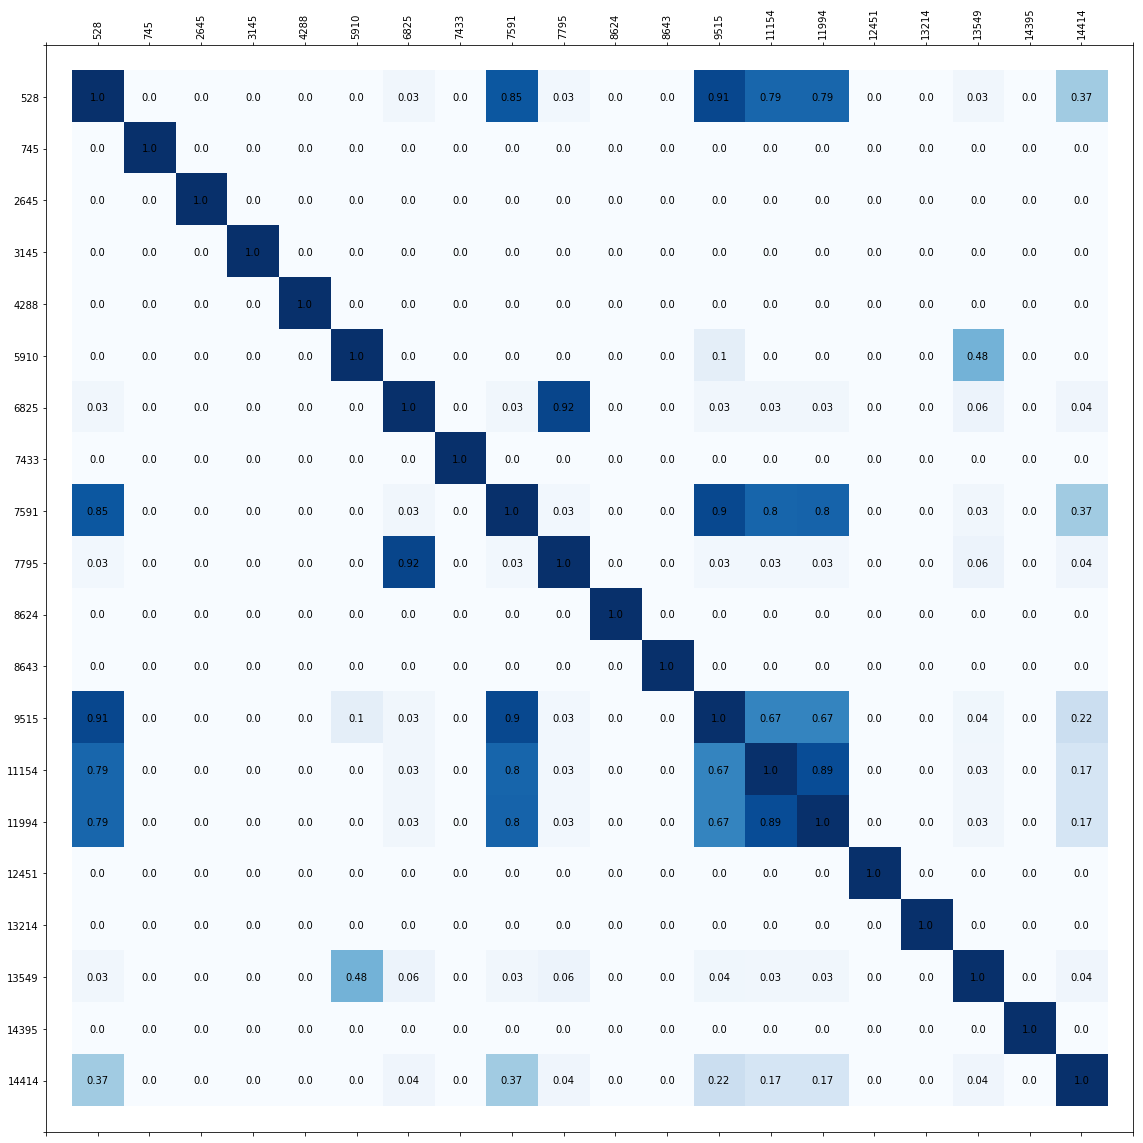

In [38]:
article_dict_subset = dict_by_ids(article_df, good_ids)
jsm = ac.jac_score_mat(article_dict_subset)
hc = ac.cluster_articles(plot = True)
print(ac.prop_unique_clusters())
# ac.display_mat(jsm, xlabs = list(article_dict.keys()))
n_subset = 20
ac.display_mat(subsetmat(jsm, list(range(n_subset))), xlabs = list(article_dict_subset.keys())[0:n_subset])

Good articles: 1703 True 6393 True
S 9 : Updated: June 1, 2019 @ 8:22 pm 
 419-636-1111 | news@bryantimes.com | 127 S. Walnut St., Bryan, OH 43506 
 Toggle navigation 
 DETROIT (AP) — The Latest on the Detroit Grand Prix (all times local): 
 6:25 p.m. 
 Josef Newgarden has won the first of two Detroit Grand Prix races, outlasting the competition Saturday on a rain-slicked road course. 

	T 1 0.54 : (AP Photo/Carlos Osorio) 
 DETROIT (AP) — The Latest on the Detroit Grand Prix (all times local): 
 6:25 p.m. 
 Josef Newgarden has won the first of two Detroit Grand Prix races, outlasting the competition Saturday on a rain-slicked road course. 

S 10 : The Team Penske driver finished nearly a second in front of Alexander Rossi, who also was the runner-up at the Indianapolis 500, and Takuma Sato. 

	T 2 1.0 : The Team Penske driver finished nearly a second in front of Alexander Rossi, who also was the runner-up at the Indianapolis 500, and Takuma Sato. 

S 11 : Newgarden, who opened the yea

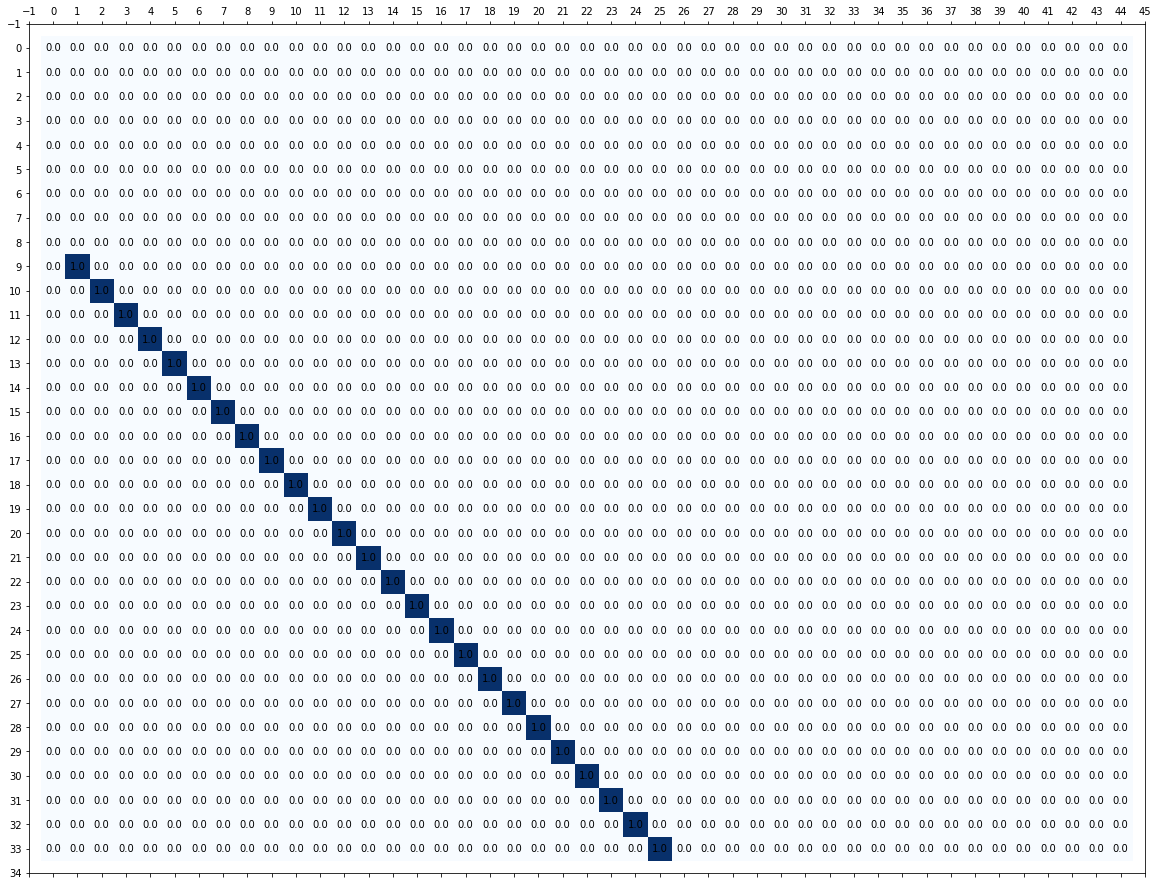

In [7]:
id1 = 1703
id2 = 6393
print("Good articles: %d" % id1, id1 in good_ids, id2, id2 in good_ids)
ac.display_mat(ac.get_match_matrix(article_dict[id1], article_dict[id2]))
ac.print_sentence_matches()

In [8]:
print(article_dict[id1])

Thank you for Reading! 
 Please log in, or sign up for a new account and purchase a subscription to continue reading. 
 (43506) 
 Today 
 Variable clouds with thunderstorms, especially early. A few storms may be severe. Low 58F. Winds W at 5 to 10 mph. Chance of rain 60%.. 
 Tonight 
 Variable clouds with thunderstorms, especially early. A few storms may be severe. Low 58F. Winds W at 5 to 10 mph. Chance of rain 60%. 
 Updated: June 1, 2019 @ 8:22 pm 
 (43506) 
 Today 
 Variable clouds with thunderstorms, especially early. A few storms may be severe. Low 58F. Winds W at 5 to 10 mph. Chance of rain 60%.. 
 Tonight 
 Variable clouds with thunderstorms, especially early. A few storms may be severe. Low 58F. Winds W at 5 to 10 mph. Chance of rain 60%. 
 Updated: June 1, 2019 @ 8:22 pm 
 419-636-1111 | news@bryantimes.com | 127 S. Walnut St., Bryan, OH 43506 
 Toggle navigation 
 DETROIT (AP) — The Latest on the Detroit Grand Prix (all times local): 
 6:25 p.m. 
 Josef Newgarden has won the

Average % unique articles, weighted by cluster size (thresh = 0.25):  0.19321817017850287
thresh = 0.75:  0.26730646193909147
Average % unique 'good' articles, weighted by cluster size (thresh = 0.25):  0.18050221567562777
thresh = 0.75:  0.24298375186691287


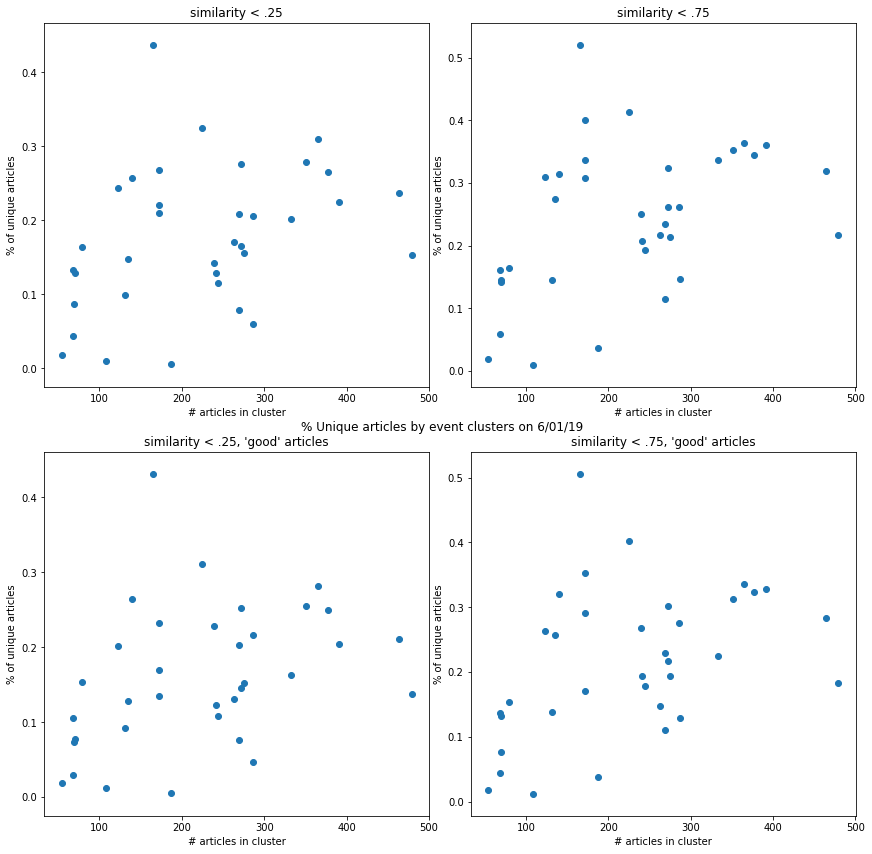

In [115]:
results = pd.read_csv(os.path.join("results", "results_20190601_clusters_temp.csv"))
results = results[[not i for i in np.isnan(results["unique25"])]]
results.loc[results["n"] > 500, "n"] = 500

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6))
fig.tight_layout()
fig.suptitle("% Unique articles by event clusters on 6/01/19")
fig.subplots_adjust(top = 1.9)

ax1 = axes[0][0]
ax1.scatter(results.loc[:, "n"], results.loc[:, "unique25"])
ax1.set_title("similarity < .25")
ax1.set_xlabel("# articles in cluster")
ax1.set_ylabel("% of unique articles")

ax2 = axes[0][1]
ax2.scatter(results.loc[:, "n"], results.loc[:, "unique75"])
ax2.set_title("similarity < .75")
ax2.set_xlabel("# articles in cluster")
ax2.set_ylabel("% of unique articles")

ax3 = axes[1][0]
ax3.scatter(results.loc[:, "n"], results.loc[:, "unique25_good"])
ax3.set_title("similarity < .25, 'good' articles")
ax3.set_xlabel("# articles in cluster")
ax3.set_ylabel("% of unique articles")

ax4 = axes[1][1]
ax4.scatter(results.loc[:, "n"], results.loc[:, "unique75_good"])
ax4.set_title("similarity < .75, 'good' articles")
ax4.set_xlabel("# articles in cluster")
ax4.set_ylabel("% of unique articles")

print("Average % unique articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n"] * results.loc[:, "unique25"])/np.sum(results.loc[:, "n"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n"] * results.loc[:, "unique75"])/np.sum(results.loc[:, "n"]))
print("Average % unique 'good' articles, weighted by cluster size (thresh = 0.25): ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique25_good"])/np.sum(results.loc[:, "n_good"]))
print("thresh = 0.75: ", np.sum(results.loc[:, "n_good"] * results.loc[:, "unique75_good"])/np.sum(results.loc[:, "n_good"]))

In [114]:
results.loc[results["n"] > 500, "n"] = 500

In [54]:
results[[not i for i in np.isnan(results["unique25"])]]

,event,n,unique25,unique75,n_good,unique25_good,unique75_good
8,13,269,0.078067,0.115242,263.0,0.076046,0.110266
9,14,464,0.237069,0.318966,426.0,0.211268,0.284038
10,15,187,0.005348,0.037433,0.0,0.005348,0.037433
13,18,272,0.165441,0.261029,254.0,0.145669,0.216535
15,21,377,0.265252,0.344828,356.0,0.250000,0.323034
16,23,286,0.206294,0.262238,218.0,0.215596,0.275229
17,24,391,0.225064,0.360614,362.0,0.204420,0.328729
19,29,269,0.208178,0.234201,231.0,0.203463,0.229437
21,31,272,0.275735,0.323529,262.0,0.251908,0.301527
22,32,287,0.059233,0.146341,279.0,0.046595,0.129032
